# Visualisation notebook of the data grouped by morphotype

## Import libraries and helper functions

In [1]:
import sys
sys.path.append('..')
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns


## Load the morphotype classification data

In [ ]:
# Load the morphotype classification data
df = pd.read_excel("morphotype_classification_data.xlsx", sheet_name='complete')

# create a new column to assign the category to the corresponding brightness condition (treatment)
df['Brightness'] = df['Category'].copy()
df['Brightness'] = df['Brightness'].replace('A', 'Left')
df['Brightness'] = df['Brightness'].replace('B', 'Right')
df['Brightness'] = df['Brightness'].replace('C', 'Bright')
df['Brightness'] = df['Brightness'].replace('D', 'Dark')

# renamed the point of entry variable
df['φ'] = df['Entry']

# create subset of the two asymmetrical brightness conditions
df_LR = df[df['Brightness'].isin(['Left','Right'])]
df_LR


In [18]:
df_LR

,Tiff name,Extension,Date accessed,Date modified,Date created,Folder Path,Date,Session,Datetime (YYYYMMDDHHMMSS),Minute,Category,Origin,Arrival,Entry,Name,Morph,Brightness,φ
0,B006C0001_20210507104459_0015_t1.295.Still005.tif,.tif,2024-02-23 11:42:14.967,2022-10-30 12:51:57,2024-02-23 11:42:14.967,D:\Brightness_paper\frames_to_ID\C\2021_05_07\,2021_05_07,1,20210507104459,15,A,Right,Left,0.334183,B006C0001_20210507104459_0015_t1.295.Still005,1,Left,0.334183
1,B006C0001_20210507104459_0015_t2.241.Still005.tif,.tif,2024-02-23 11:42:14.984,2022-10-30 12:52:42,2024-02-23 11:42:14.967,D:\Brightness_paper\frames_to_ID\C\2021_05_07\,2021_05_07,1,20210507104459,15,A,Right,Left,0.104524,B006C0001_20210507104459_0015_t2.241.Still005,2,Left,0.104524
2,B006C0001_20210507104459_0032_t1.304.Still005.tif,.tif,2024-02-23 11:42:15.000,2022-10-30 12:53:22,2024-02-23 11:42:14.984,D:\Brightness_paper\frames_to_ID\C\2021_05_07\,2021_05_07,1,20210507104459,32,A,Right,Left,0.380946,B006C0001_20210507104459_0032_t1.304.Still005,3,Left,0.380946
3,B006C0001_20210507104459_0049_t1.327.Still005.tif,.tif,2024-02-23 11:42:15.007,2022-10-30 12:54:06,2024-02-23 11:42:15.003,D:\Brightness_paper\frames_to_ID\C\2021_05_07\,2021_05_07,1,20210507104459,49,A,Right,Left,-0.057407,B006C0001_20210507104459_0049_t1.327.Still005,4,Left,-0.057407
4,B006C0001_20210507104459_0049_t2.314.Still005.tif,.tif,2024-02-23 11:42:15.017,2022-10-30 12:54:51,2024-02-23 11:42:15.017,D:\Brightness_paper\frames_to_ID\C\2021_05_07\,2021_05_07,1,20210507104459,49,A,Right,Left,0.159299,B006C0001_20210507104459_0049_t2.314.Still005,5,Left,0.159299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,B015C0030_20210520123734_0019_t1.280.Still005.tif,.tif,2024-02-23 11:37:00.644,2022-10-30 13:13:14,2024-02-23 11:37:00.611,D:\Brightness_paper\frames_to_ID\B\2021_05_20\,2021_05_20,0,20210520123734,19,B,Left,Right,0.083902,B015C0030_20210520123734_0019_t1.280.Still005,8,Right,0.083902
210,B015C0030_20210520123734_0023_t1.95.Still005.tif,.tif,2024-02-23 11:37:00.686,2022-10-30 13:13:58,2024-02-23 11:37:00.644,D:\Brightness_paper\frames_to_ID\B\2021_05_20\,2021_05_20,0,20210520123734,23,B,Left,Right,-0.005022,B015C0030_20210520123734_0023_t1.95.Still005,undetermined,Right,-0.005022
211,B015C0029_20210520120627_0019_t1.126.Still005.tif,.tif,2024-02-23 11:37:00.320,2022-10-30 13:07:00,2024-02-23 11:37:00.297,D:\Brightness_paper\frames_to_ID\B\2021_05_20\,2021_05_20,9,20210520120627,19,B,Right,Right,0.141130,B015C0029_20210520120627_0019_t1.126.Still005,12,Right,0.141130
212,B015C0029_20210520120627_0020_t1.47.Still005.tif,.tif,2024-02-23 11:37:00.343,2022-10-30 13:07:43,2024-02-23 11:37:00.320,D:\Brightness_paper\frames_to_ID\B\2021_05_20\,2021_05_20,9,20210520120627,20,B,Right,Right,0.264992,B015C0029_20210520120627_0020_t1.47.Still005,17,Right,0.264992


## Point of entry (φ) by morphotype

### Histograms showing the distribution of φ

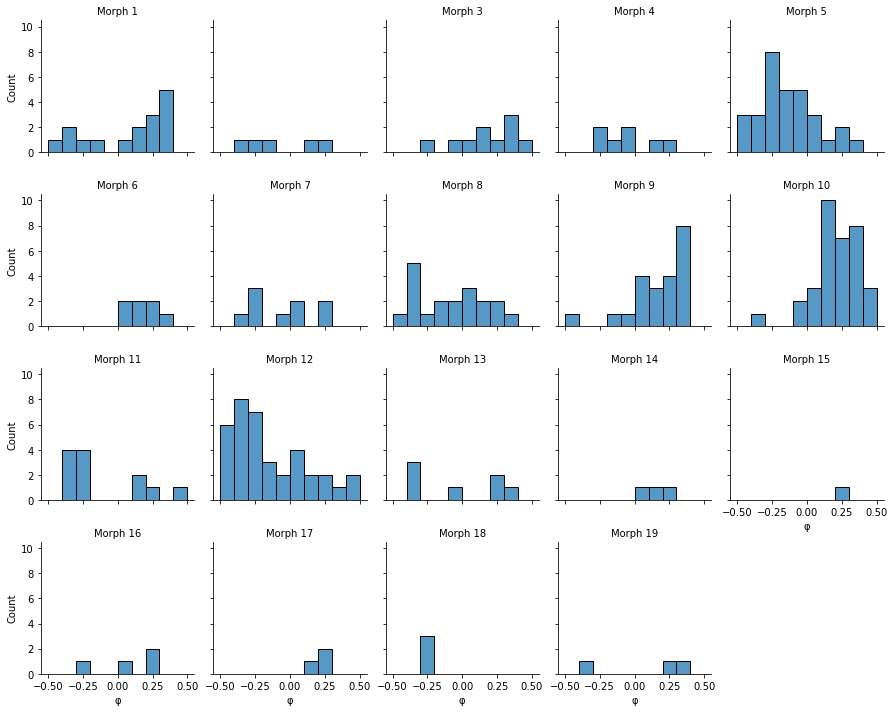

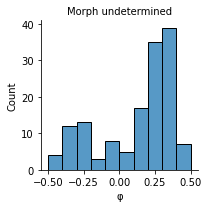

In [3]:
col_order = [ 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]

g = sns.FacetGrid(df, col="Morph",  height=2.5, col_wrap=5,col_order = col_order)
for cls, ax in g.axes_dict.items():
    sns.histplot(
        data=df[df["Morph"] == cls],
        x='φ',
        bins=(-0.5,-0.4,-0.3,-0.2,-0.1,0,0.1,0.2,0.3,0.4,0.5),
        ax=ax,legend=None, 
        alpha=0.75)

g.set_titles(template="{col_var} {col_name}")
plt.setp(g.axes[1], title="")
plt.tight_layout()
#plt.savefig('treatment_histograms_by_morph_nostack.png', dpi=400)
plt.show()

g = sns.FacetGrid(df, col="Morph", col_order=['undetermined'])
for cls, ax in g.axes_dict.items():
    sns.histplot(
        data=df[df["Morph"] == cls],
        x='φ',
        bins=(-0.5,-0.4,-0.3,-0.2,-0.1,0,0.1,0.2,0.3,0.4,0.5),
        ax=ax,legend=None, 
        alpha=0.75)

g.set_titles(template="{col_var} {col_name}")
plt.tight_layout()
plt.show()

### Histograms stacked by brightness condition

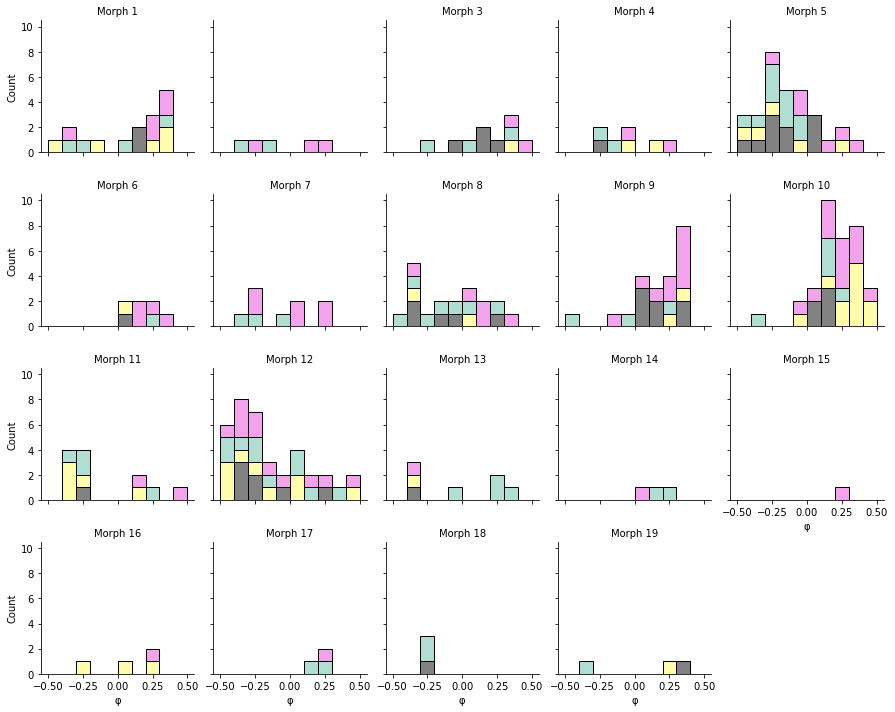

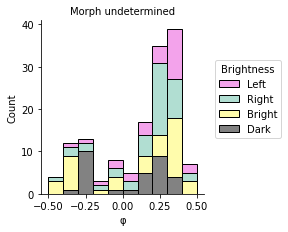

In [4]:
col_order = [ 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]#,'undetermined']

g = sns.FacetGrid(df, col="Morph",  height=2.5, col_wrap=5,col_order = col_order)
for cls, ax in g.axes_dict.items():
    sns.histplot(
        data=df[df["Morph"] == cls],
        x='φ', hue="Brightness",
        bins=(-0.5,-0.4,-0.3,-0.2,-0.1,0,0.1,0.2,0.3,0.4,0.5),
         multiple='stack',
        palette={'Left':'#EF85E5','Right':'#97D4C4','Bright':'#FFFC90','Dark':'#585858'},
        ax=ax,legend=None,
        alpha=0.75)

g.set_titles(template="{col_var} {col_name}")
plt.setp(g.axes[1], title="")
plt.tight_layout()
#plt.savefig('treatment_histograms_by_morph.png', dpi=400)
plt.show()


g = sns.FacetGrid(df, col="Morph", col_order=['undetermined'])
for cls, ax in g.axes_dict.items():
    sns.histplot(
        data=df[df["Morph"] == cls],
        x='φ', hue="Brightness",
        bins=(-0.5,-0.4,-0.3,-0.2,-0.1,0,0.1,0.2,0.3,0.4,0.5),
         multiple='stack',
        palette={'Left':'#EF85E5','Right':'#97D4C4','Bright':'#FFFC90','Dark':'#585858'},
        ax=ax,legend=ax is g.axes.flat[-1], 
        alpha=0.75)

g.set_titles(template="{col_var} {col_name}")
sns.move_legend(ax, loc="upper right", bbox_to_anchor=(1.5, 0.8))
plt.show()

### Boxplots of φ vs origin by morphotype

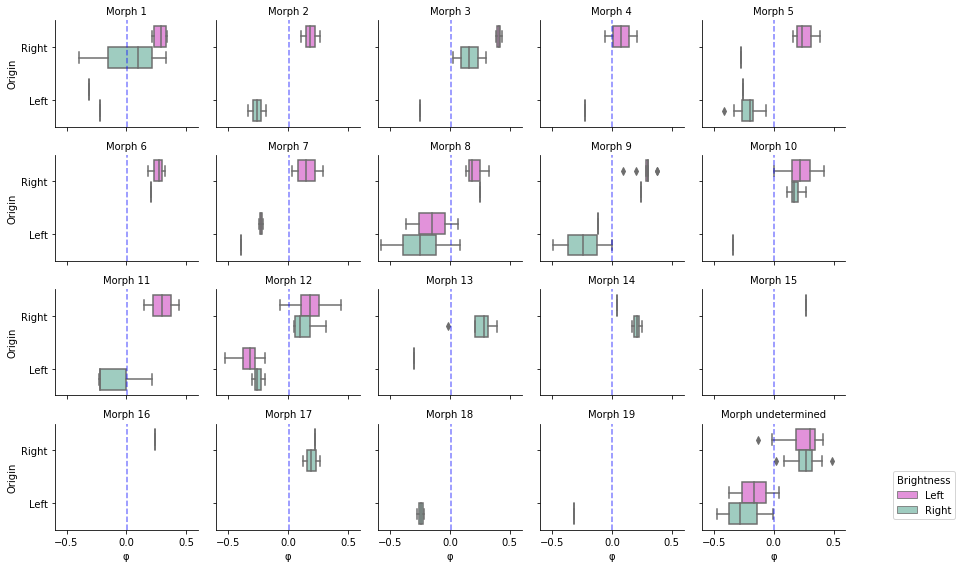

In [5]:
col_order = [1,2,3,4,5,6,7,8,9,10,
             11,12,13,14,15,16,17,18,19,'undetermined']

ori_df_LR = df_LR[df_LR.Origin.isin(['Left','Right'])]

g = sns.catplot(x="φ", y="Origin",  hue='Brightness',
                palette=['#EF85E5','#97D4C4'],
                col="Morph", col_order=col_order,
                col_wrap=5,
                data=ori_df_LR, 
                orient="h", height=2, aspect=1.2, 
                kind="box", dodge=True, legend=None)
g.set(xlim=(-0.6,0.6))
g.set_titles(template="{col_var} {col_name}")
axes = g.axes.flatten()
plt.legend(title="Brightness", loc='upper right', bbox_to_anchor=(1.8,0.6))
# iterate through the axes
for i, ax in enumerate(axes):
    ax.axvline(0.005, ls='--', c='blue', alpha=0.5)
    #x.text(la[i][2], la[i][3], la[i][4], c='orange')
#plt.savefig('treatment_boxplots_by_morph_legend.png', dpi=400)
plt.show()

## Side of Origin by morphotype

### Barplots of side of origin by morphotype

ORIGIN


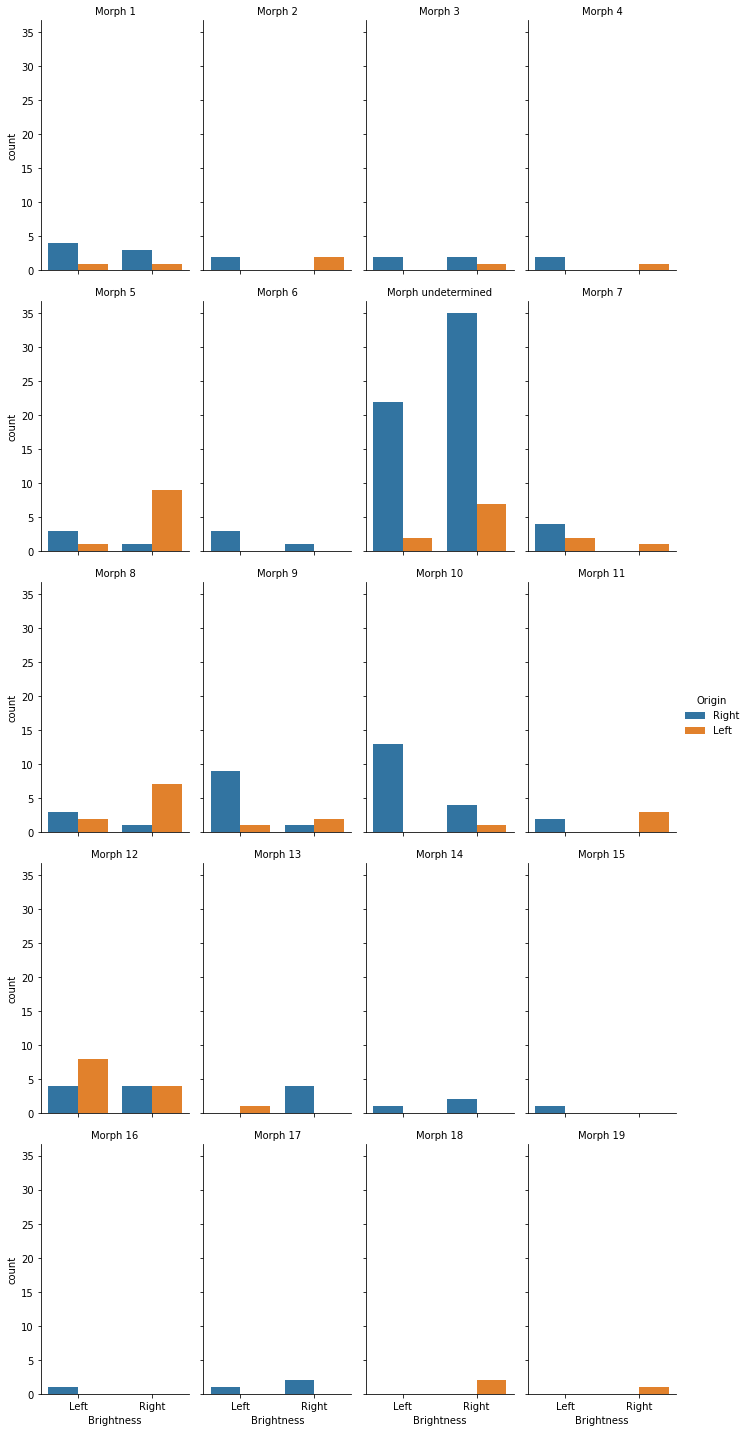

In [6]:
subdf_LR = df_LR[df_LR['Origin'].isin(['Left','Right'])]
print("ORIGIN")

g = sns.catplot(
    data=subdf_LR, x="Brightness", hue='Origin', col="Morph", col_wrap=4,
    kind="count", height=4, aspect=.6,
)
g.set_titles("{col_var} {col_name}")


### Left-Right barplots of origin side by morphotype

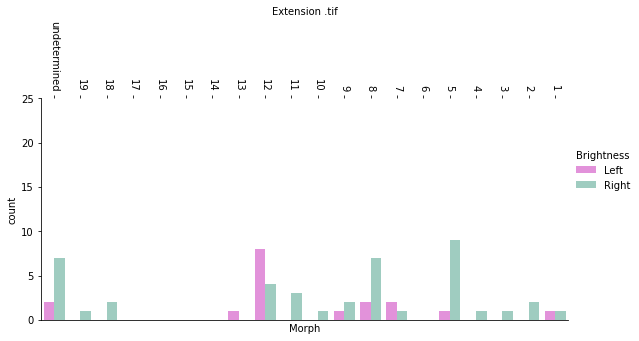

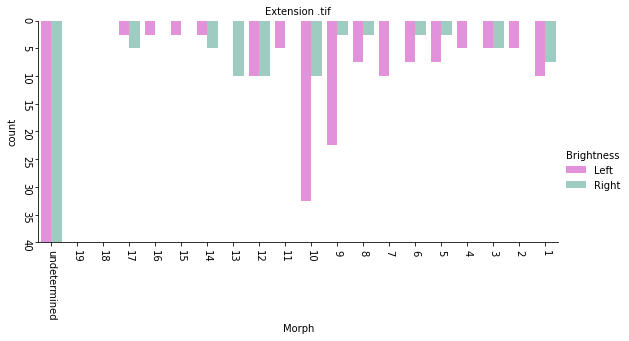

In [7]:
morph_order_r = list(reversed([ 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,'undetermined']))

ori_left_df = df_LR[df_LR['Origin']=='Left']
g = sns.catplot(
    data=ori_left_df, x="Morph", hue='Brightness', col="Extension", col_wrap=1,
    order = morph_order_r, palette=['#EF85E5','#97D4C4'], orient='v',
    kind="count", height=4, aspect=2, 
)
g.set(ylim=(0, 25))
g.set_xticklabels(rotation=-90)
g.axes[0].xaxis.set_ticks_position("top")
g.set_titles("{col_var} {col_name}")
#plt.savefig('origin_barplot_LHS.png', bbox_inches='tight', transparent=True, dpi=400)
plt.show()



ori_right_df = df_LR[df_LR['Origin']=='Right']
g = sns.catplot(
    data=ori_right_df, x="Morph", hue='Brightness', col="Extension", col_wrap=1,
    order = morph_order_r, palette=['#EF85E5','#97D4C4'], orient='v', hue_order=['Left','Right'],
    kind="count", height=4, aspect=2
)
g.set(ylim=(0, 25))
g.axes[0].set_ylim(0,15)
g.axes[0].invert_yaxis()
g.set_xticklabels(rotation=-90)
g.set_yticklabels(rotation=-90)
g.set_titles("{col_var} {col_name}")
#plt.savefig('origin_barplot_RHS.png', bbox_inches='tight', transparent=True, dpi=400)
plt.show()


### Barplots of origin side stacked by morphotype

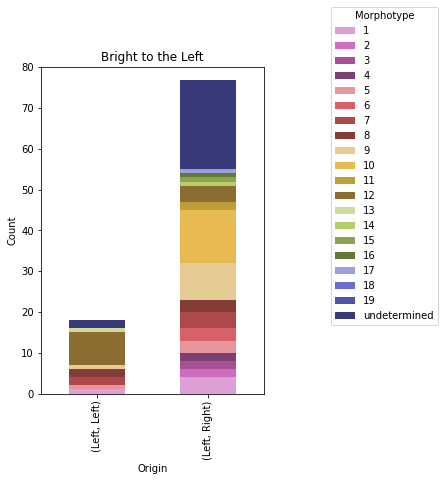

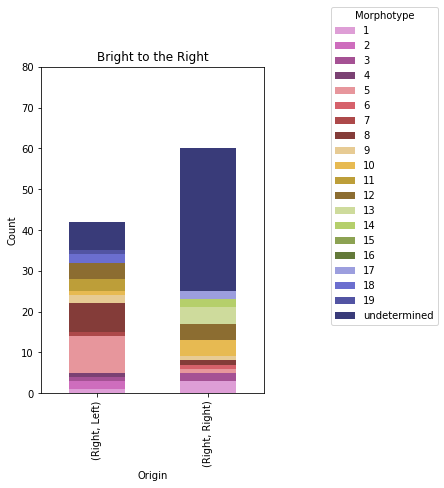

In [13]:
treatments = ['Left','Right']
sub_df = df[df['Origin'].isin(['Left','Right'])]
sub_df = sub_df[sub_df['Brightness'].isin(treatments)]

arr_df = sub_df.groupby(['Brightness', 'Origin', 'Morph']).size().unstack(level=2)

colormap = 'tab20b_r'#'tab20c'

g = arr_df.groupby('Brightness').plot(kind = 'bar', 
                                     xlabel='Origin',
                                     ylabel='Count',
                                     colormap=colormap,
                                     stacked=True,
                                     figsize=(4,6),
                                     ylim=[0,80],
                                     legend=True)
# iterate through the axes
for i, ax in enumerate(g):
    ax.legend(title='Morphotype', loc='upper right', bbox_to_anchor=(1.8,1.2))
    ax.set_title("Bright to the "+treatments[i])
    ax.figure.savefig('morph_barplots_by_Origin-'+treatments[i]+'.png', bbox_inches='tight', transparent=True, dpi=400)
    #print('morph_barplots_by_arrival-'+treatments[i]+'.png')

## Side of Arrival by morphotype

### Barplots of side of arrival by morphotype

ARRIVAL


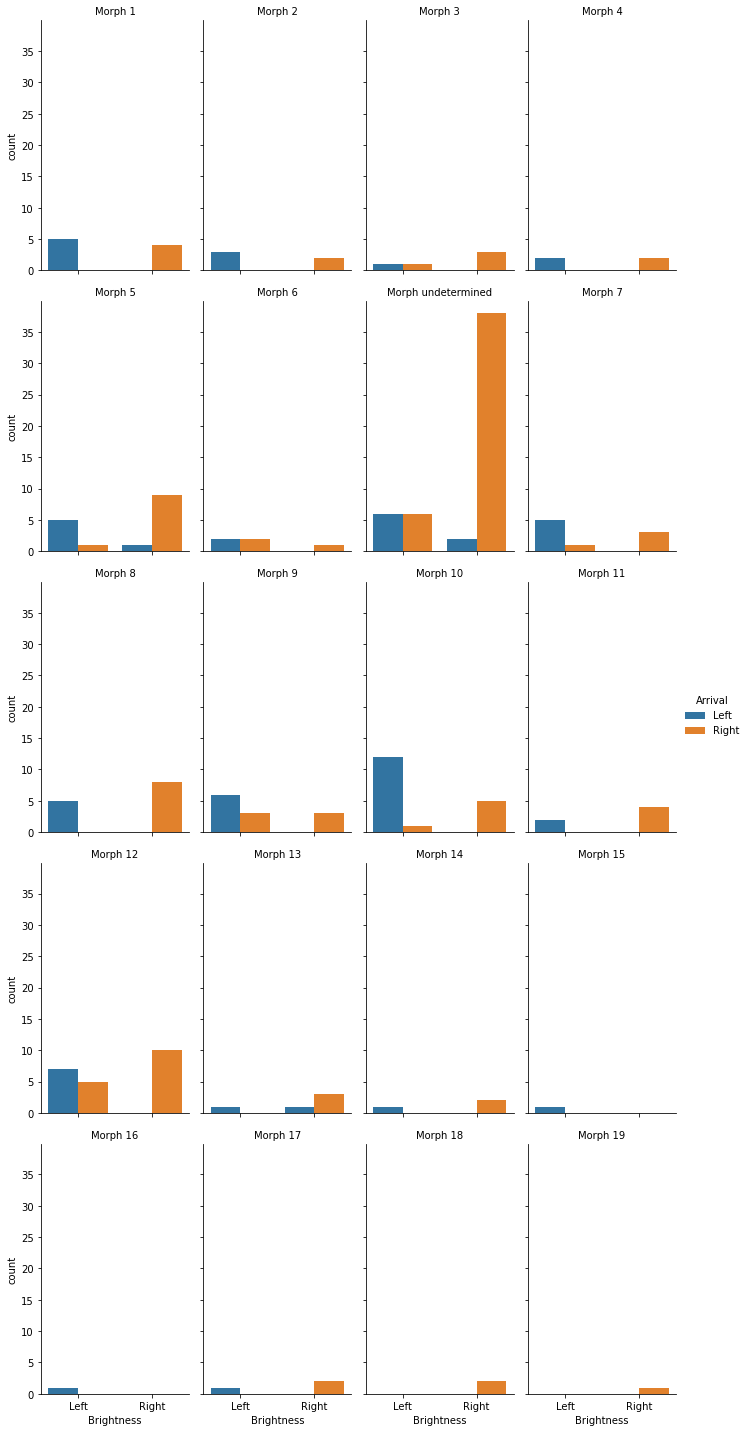

In [14]:
subdf_LR = df_LR[df_LR['Arrival'].isin(['Left','Right'])]
print("ARRIVAL")
g = sns.catplot(
    data=subdf_LR, x="Brightness", hue='Arrival', col="Morph", col_wrap=4,
    kind="count", height=4, aspect=.6,
)
g.set_titles("{col_var} {col_name}")
plt.show()

### Left-Right barplots of arrival side by morphotype

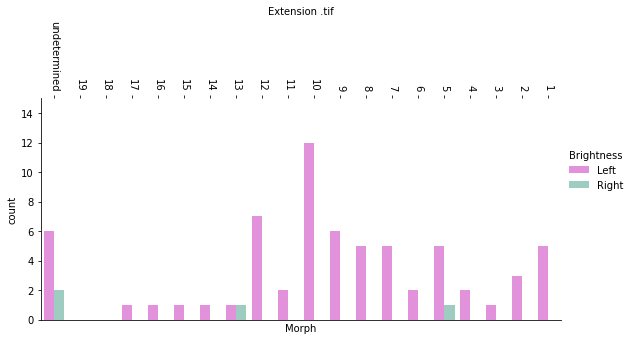

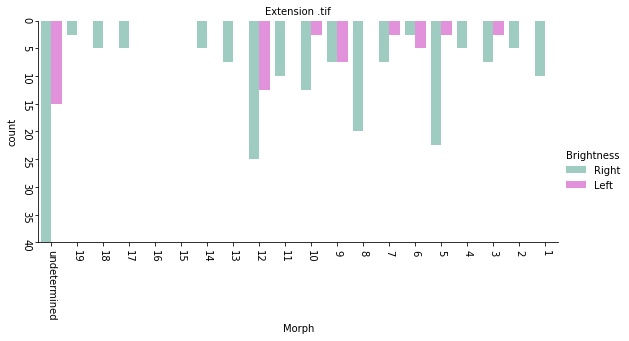

In [15]:
# LHS:

arr_left_df = df_LR[df_LR['Arrival']=='Left']

g = sns.catplot(
    data=arr_left_df, x="Morph", hue='Brightness', col="Extension", col_wrap=1,
    order = morph_order_r, palette=['#EF85E5','#97D4C4'], orient='v',
    kind="count", height=4, aspect=2, 
)
g.set(ylim=(0, 15))
g.set_xticklabels(rotation=-90)
g.axes[0].xaxis.set_ticks_position("top")
g.set_titles("{col_var} {col_name}")
#plt.savefig('arrival_barplot_LHS.png', bbox_inches='tight', transparent=True, dpi=400)
plt.show()


# RHS:

arr_right_df = df_LR[df_LR['Arrival']=='Right']
g = sns.catplot(
    data=arr_right_df, x="Morph", hue='Brightness', col="Extension", col_wrap=1,
    order = morph_order_r, palette=['#97D4C4','#EF85E5'], orient='v', hue_order=['Right','Left'],
    kind="count", height=4, aspect=2
)
g.set(ylim=(0, 15))
g.axes[0].set_ylim(0,15)
g.axes[0].invert_yaxis()
g.set_xticklabels(rotation=-90)
g.set_yticklabels(rotation=-90)
g.set_titles("{col_var} {col_name}")
#plt.savefig('arrival_barplot_RHS.png', bbox_inches='tight', transparent=True, dpi=400)
plt.show()



### Barplots of arrival side stacked by morphotype


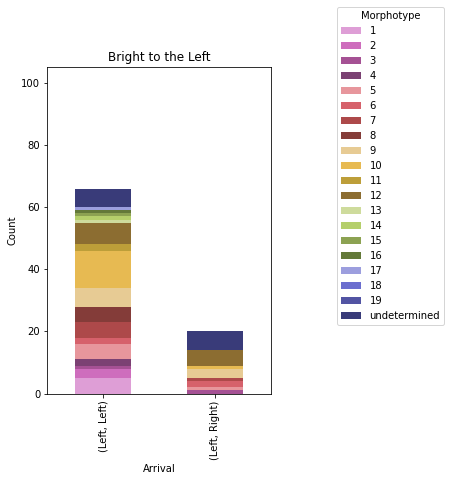

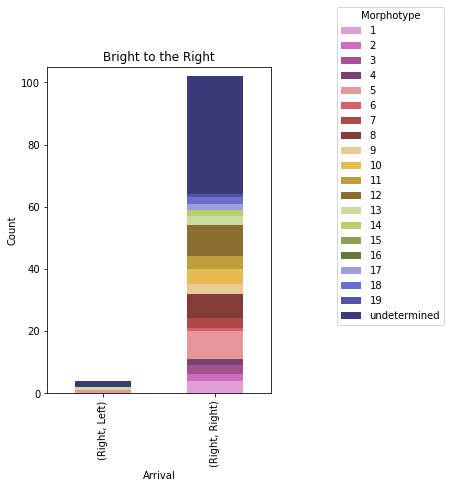

In [16]:
sub_df = df[df['Arrival'].isin(['Left','Right'])]
sub_df = sub_df[sub_df['Brightness'].isin(treatments)]

arr_df = sub_df.groupby(['Brightness', 'Arrival', 'Morph']).size().unstack(level=2)

g = arr_df.groupby('Brightness').plot(kind = 'bar', 
                                     xlabel='Arrival',
                                     ylabel='Count',
                                     colormap='tab20b_r',
                                     stacked=True,
                                     figsize=(4,6),
                                     ylim=[0,105],
                                     legend=True)
# iterate through the axes
for i, ax in enumerate(g):
    ax.legend(title='Morphotype', loc='upper right', bbox_to_anchor=(1.8,1.2))
    ax.set_title("Bright to the "+treatments[i])
    #ax.figure.savefig('morph_barplots_by_arrival-'+treatments[i]+'.png', bbox_inches='tight', transparent=True, dpi=400)
plt.show()